# DATA ANALYSIS ON GOOGLE PLAY STORE APP RATINGS

### Import the Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read Data

In [2]:
google_data = pd.read_csv('googleplaystore.csv')

In [3]:
type(google_data)

pandas.core.frame.DataFrame

In [4]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google_data.shape

(10841, 13)

In [6]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<Axes: >

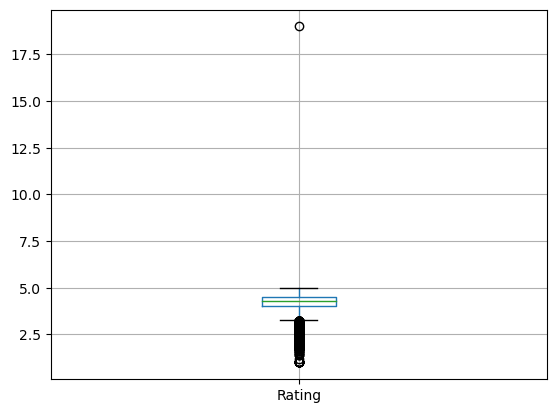

In [7]:
google_data.boxplot()

Text(0.5, 1.0, 'Rating Distribution')

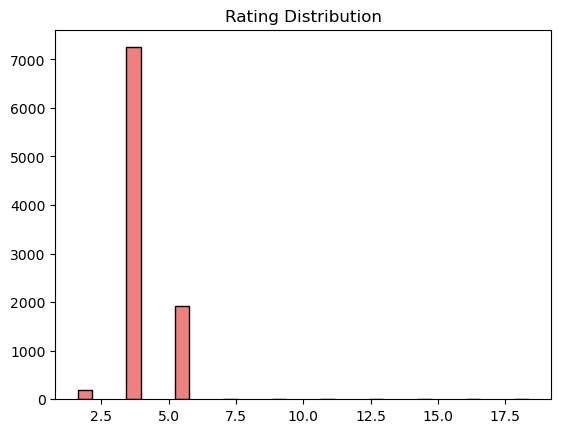

In [8]:
google_data.hist(rwidth=0.3, grid=False, color='lightcoral', edgecolor='black')
plt.title('Rating Distribution')

In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

### Count the number of missing values in the Dataframe

In [10]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Check for Outliers [Ratings > 5]

In [12]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
google_data.drop([10472],inplace=True)

In [14]:
google_data[10471:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<Axes: >

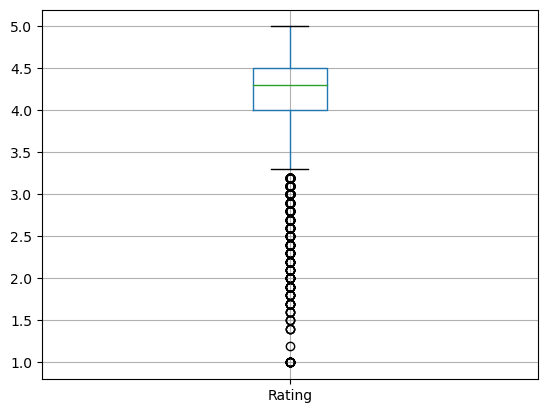

In [15]:
google_data.boxplot()

Text(0.5, 1.0, 'Rating Distribution')

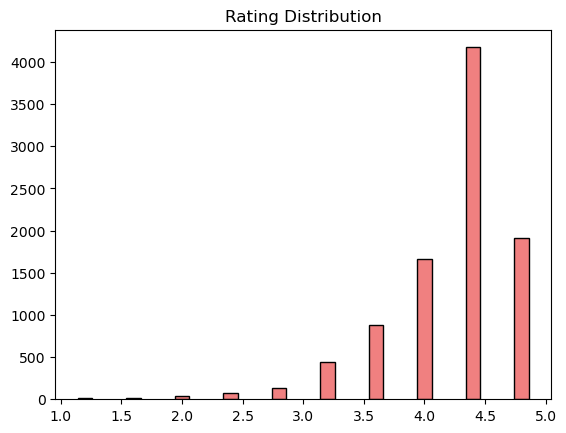

In [17]:
google_data.hist(rwidth=0.3, grid=False, color='lightcoral', edgecolor='black')
plt.title('Rating Distribution')

### Remove columns that are 90% empty

In [18]:
threshold = len(google_data)* 0.1
threshold

1084.0

In [19]:
google_data.dropna(thresh=threshold, axis=1, inplace=True)

In [20]:
print(google_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


## Data Imputation and Manipulation

### Fill the null values with appropriate values using aggregate functions such as mean, median or mode.

In [21]:
def impute_median(series):
    return series.fillna(series.median())

In [22]:
google_data.Rating = google_data['Rating'].transform(impute_median)

In [23]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [24]:
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [25]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace=True)

In [26]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [27]:
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce')

In [28]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [29]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Data Visualization

<Axes: title={'center': 'Number of apps available for each Category'}, xlabel='Category  -->', ylabel='Number of apps -->'>

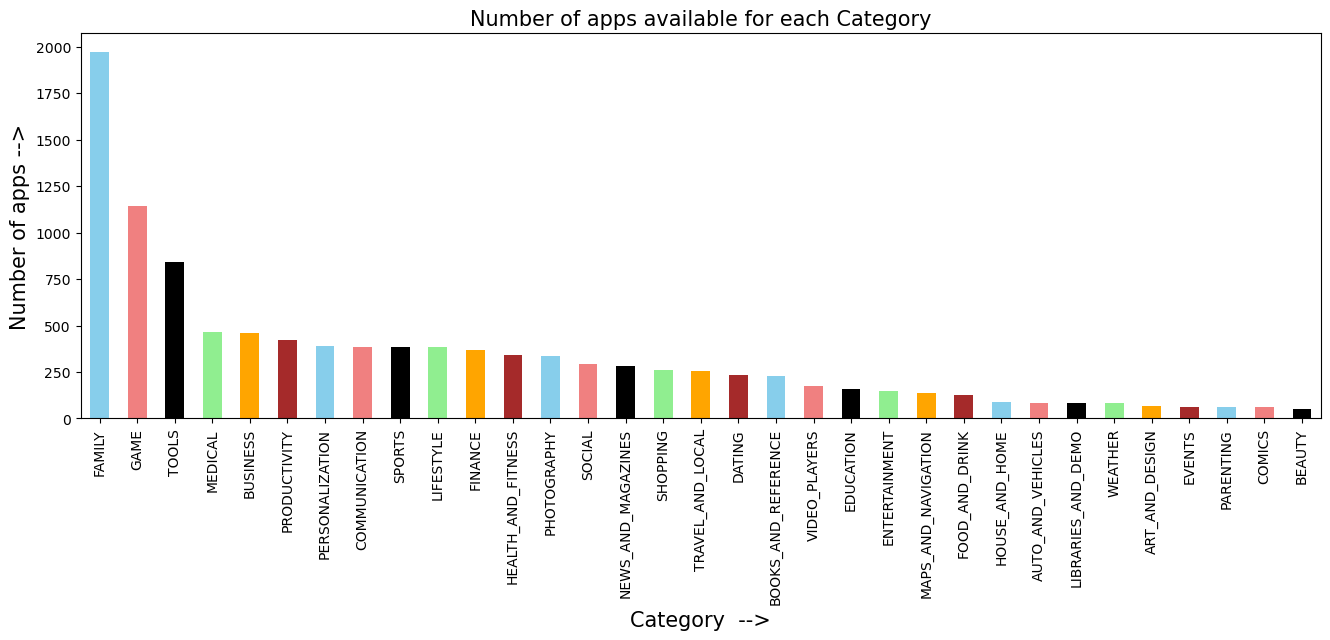

In [31]:
colors = ['skyblue', 'lightcoral', 'black', 'lightgreen', 'orange', 'brown']
plt.figure(figsize=(16,5))
plt.title('Number of apps available for each Category', fontsize = 15)
plt.xlabel('Category  -->', fontsize=15)
plt.ylabel('Number of apps -->', fontsize=15)
google_data.Category.value_counts().plot(kind='bar', color=colors)

Text(0.5, 1.0, 'Content Rating Distribution')

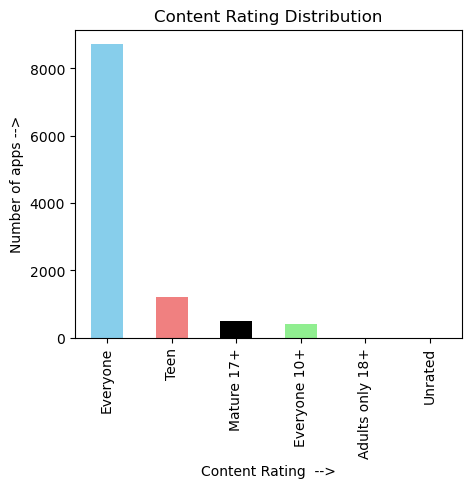

In [32]:
colors = ['skyblue', 'lightcoral', 'black', 'lightgreen', 'orange', 'brown']
plt.figure(figsize=(5,4))
google_data['Content Rating'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Content Rating  -->')
plt.ylabel('Number of apps -->')
plt.title('Content Rating Distribution')

In [33]:
grp = google_data.groupby('Category')
w = grp['Installs'].agg(np.mean)
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

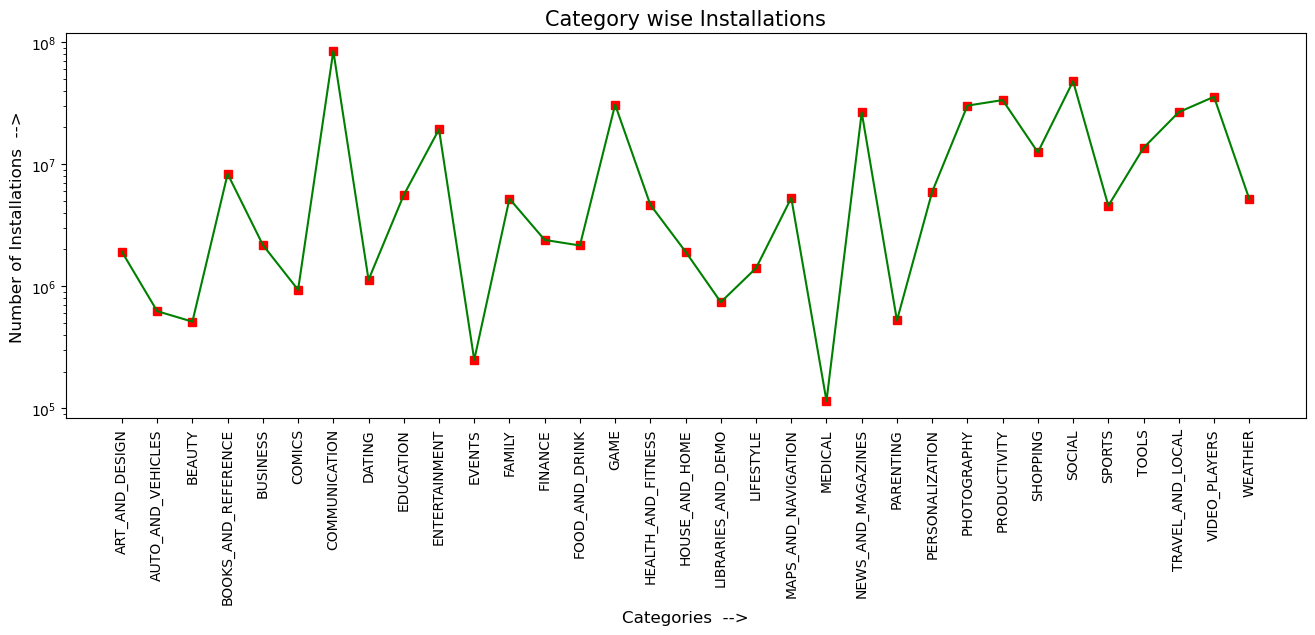

In [34]:
plt.figure(figsize=(16,5))
plt.plot(w,'rs')
plt.plot(w, color='g')
plt.xticks(rotation=90)
plt.title('Category wise Installations', fontsize=15)
plt.xlabel('Categories  -->', fontsize=12)
plt.ylabel('Number of Installations  -->', fontsize=12)
plt.yscale('log')
plt.show()

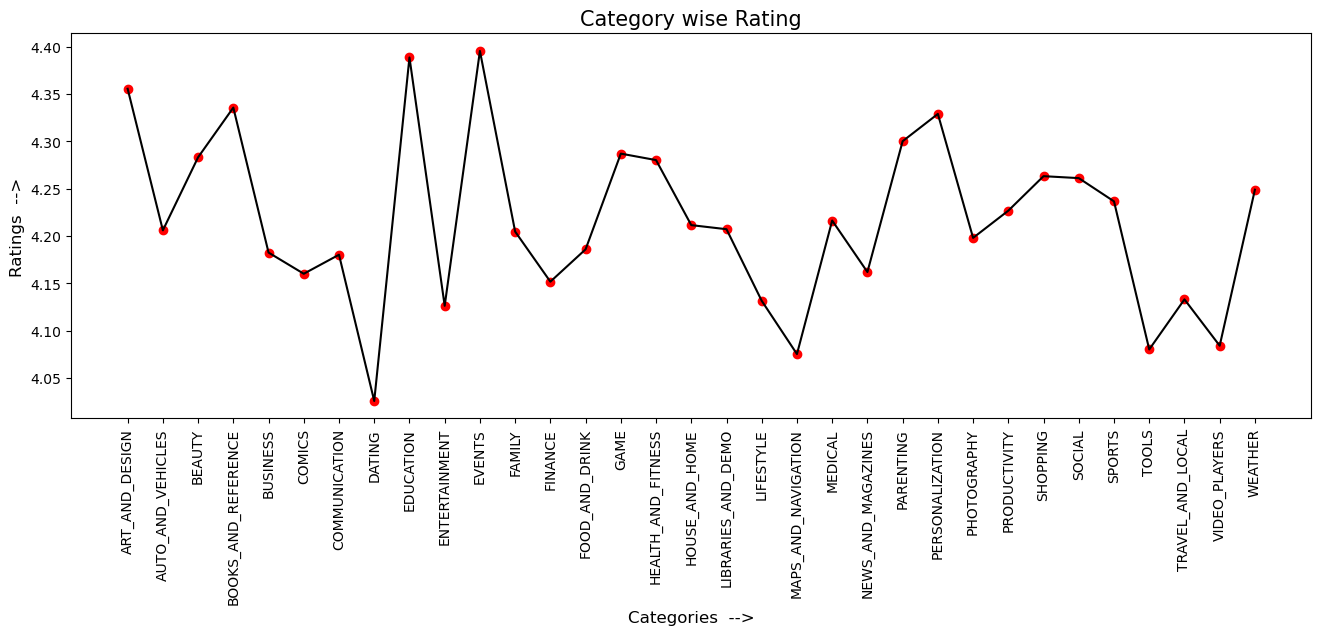

In [36]:
plt.figure(figsize=(16,5))
plt.plot(x, "ro")
plt.plot(x, color='black')
plt.xticks(rotation=90)
plt.title('Category wise Rating', fontsize=15)
plt.xlabel('Categories  -->', fontsize=12)
plt.ylabel('Ratings  -->', fontsize=12)
plt.show()

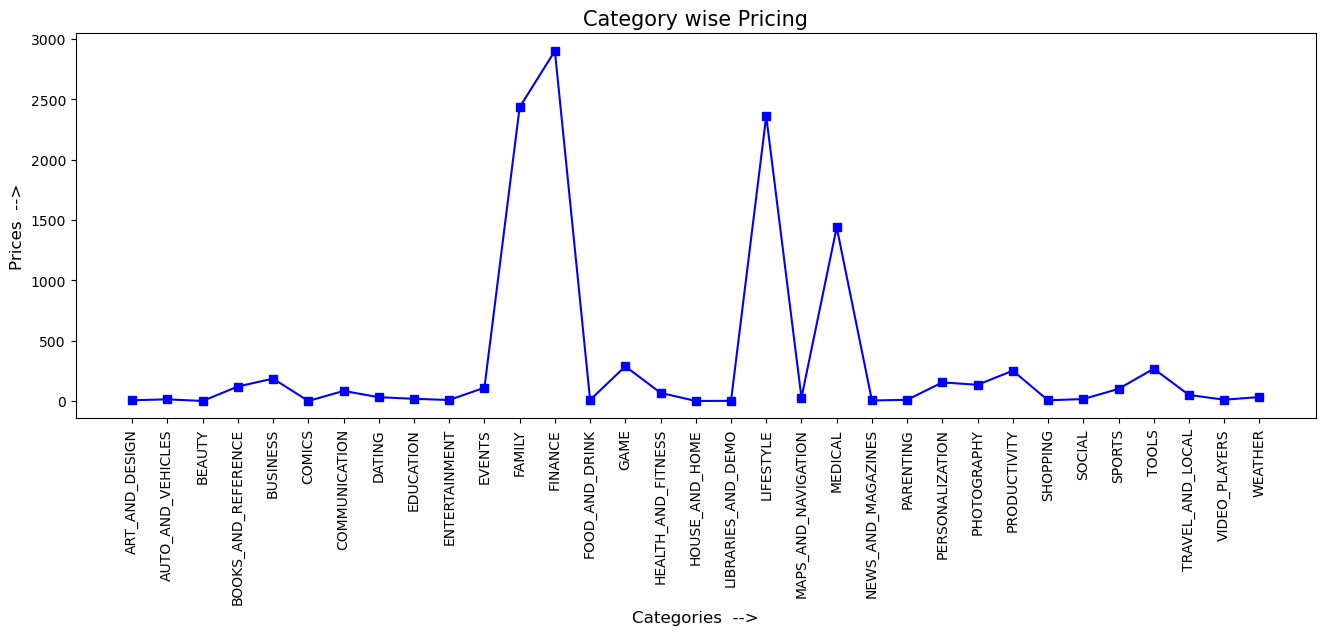

In [37]:
plt.figure(figsize=(16,5))
plt.plot(y, 'bs')
plt.plot(y, color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing', fontsize=15)
plt.xlabel('Categories  -->', fontsize=12)
plt.ylabel('Prices  -->', fontsize=12)
plt.show()

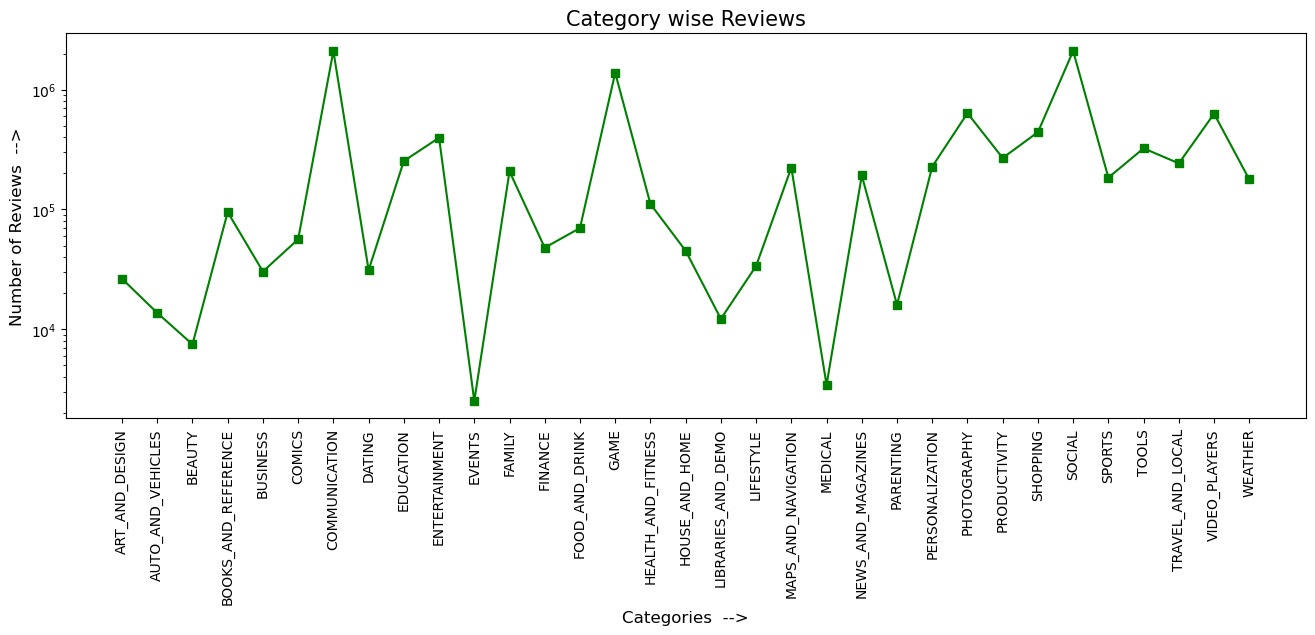

In [38]:
plt.figure(figsize=(16,5))
plt.plot(z,'gs')
plt.plot(z, color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews', fontsize=15)
plt.xlabel('Categories  -->', fontsize=12)
plt.ylabel('Number of Reviews  -->', fontsize=12)
plt.yscale('log')
plt.show()